Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [4]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [8]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
poly_1 = PolynomialFeatures(1)
fie = poly_1.fit_transform(X)
fie

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [9]:
from numpy import linalg
# Vaš kôd ovdje
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(fie), fie)), np.transpose(fie)), y)
print(w)
w_pinv = np.matmul(np.linalg.pinv(fie), y)
print(w_pinv)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

4.085714285714285
2.0428571428571427


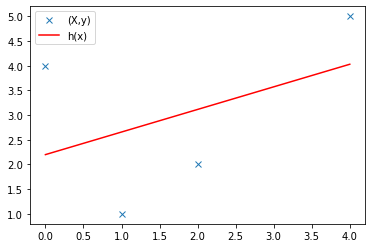

In [10]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
plt.plot(X, y, 'x', label = "(X,y)");
h = np.matmul(fie, np.transpose(w))
plt.plot(X, h, 'r-',  label = "h(x)")
plt.legend(loc="best")

E = np.sum((y - h) ** 2) / 2
print(E)
MSE = sklearn.metrics.mean_squared_error(y, h)
print(MSE)

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [7]:
# Vaš kôd ovdje
w_error = np.matmul(np.linalg.inv(fie), y)

LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [12]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
reg = LinearRegression().fit(X, y)
print(reg.intercept_)
print(reg.coef_)
h_x = reg.predict(X)
E_2 = np.sum((y - h_x) ** 2) / 2
print(E_2)

2.2
[0.45714286]
4.085714285714286


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [43]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    return f(X) + np.random.normal(0, noise, X.shape[0]).reshape(X.shape[0],1)

In [44]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [53]:
# Vaš kôd ovdje
X_2 = make_instances(-5, 5, 50)
def f(X):
    return np.array([5 + x - 2 * (x**2) - 5 * (x**3) for x in X])
y_2 = make_labels(X_2, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

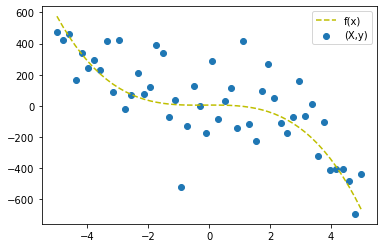

In [54]:
# Vaš kôd ovdje
plt.scatter(X_2, y_2, label = "(X,y)")
plt.plot(X_2, f(X_2), 'y--', label = "f(x)")
plt.legend(loc="best")
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

748896.9212198216


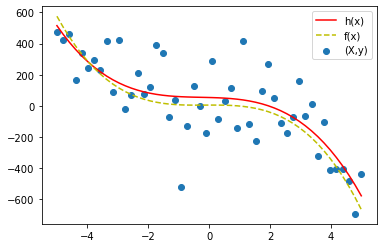

In [55]:
# Vaš kôd ovdje
poly_3 = PolynomialFeatures(3)
fie_2 = poly_3.fit_transform(X_2)
reg = LinearRegression().fit(fie_2, y_2)

plt.scatter(X_2, y_2, label = "(X,y)")
plt.plot(X_2, reg.predict(fie_2), 'r-', label = "h(x)")
plt.plot(X_2, f(X_2), 'y--', label = "f(x)")
plt.legend(loc="best")
print(np.sum((y_2 - reg.predict(fie_2)) ** 2) / 2)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

E(h1|D) = 940051.8075491311
E(h3|D) = 748896.9212198216
E(h5|D) = 717314.1874870225
E(h10|D) = 660914.928938136
E(h20|D) = 526706.1702358916


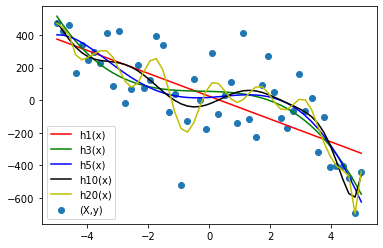

In [71]:
# Vaš kôd ovdje
color = ['r', 'g', 'b', 'k', 'y']
plt.scatter(X_2, y_2, label = "(X,y)")
for ind, d in enumerate([1, 3, 5, 10, 20]):
    
    poly = PolynomialFeatures(d)
    fie_3 = poly.fit_transform(X_2)
    reg = LinearRegression().fit(fie_3, y_2)
    
    plt.plot(X_2, reg.predict(fie_3), color[ind] + '-', label = "h" + str(d) + "(x)")
    
    E = np.sum((y_2 - reg.predict(fie_3)) ** 2) / 2
    print("E(h" + str(d) + "|D) = " + str(E))
    
plt.legend(loc="best")
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

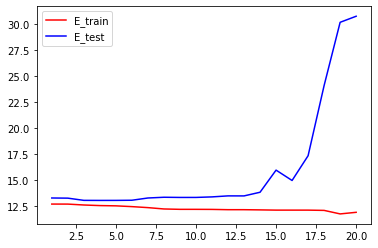

In [77]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
E_train = []
E_test = []
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_2, y_2, test_size=0.5)
for ind, d in enumerate(np.arange(1,21)):
    
    poly = PolynomialFeatures(d)
    fie_train = poly.fit_transform(X_train_3)
    reg = LinearRegression().fit(fie_train, y_train_3)
    
    E_train.append(np.sum((y_train_3 - reg.predict(fie_train)) ** 2) / 2)
    E_test.append(np.sum((y_test_3 - reg.predict(poly.fit_transform(X_test_3))) ** 2) / 2)

plt.plot(np.arange(1,21), log(E_train), 'r-', label = "E_train")
plt.plot(np.arange(1,21), log(E_test), 'b-', label = "E_test")
plt.legend(loc="best")
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

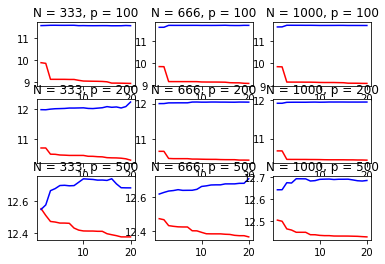

In [33]:
# Vaš kôd ovdje
parts = [1/3, 2/3, 1]
noises = [100, 200, 500]
X = make_instances(-5, 5, 1000)
X_train_all, X_test_all = train_test_split(X, test_size=0.5)

for i, noise in enumerate(noises):
    y_train_all = make_labels(X_train_all, f, noise)
    y_test_all = make_labels(X_train_all, f, noise)
    
    for j, part in enumerate(parts):
        mask = np.full(500, False)
        mask[:int(500 * part)] = True
        
        np.random.shuffle(mask)
        X_train = X_train_all[mask]
        y_train = y_train_all[mask]
        np.random.shuffle(mask)
        X_test = X_test_all[mask]
        y_test = y_test_all[mask]
        
        E_train = []
        E_test = []
        for ind, d in enumerate(np.arange(1,21)):

            poly = PolynomialFeatures(d)
            fie_train = poly.fit_transform(X_train)
            reg = LinearRegression().fit(fie_train, y_train)

            E_train.append(np.sum((y_train - reg.predict(fie_train)) ** 2) / (500 * part))
            E_test.append(np.sum((y_test - reg.predict(poly.fit_transform(X_test))) ** 2) / (500 * part))
    
        plt.subplot(3,3, i*3 + j + 1)
        plt.plot(np.arange(1,21), log(E_train), 'r-')
        plt.plot(np.arange(1,21), log(E_test), 'b-')
        plt.title("N = " + str(int(part*1000)) + ", p = " + str(noise))
        #plt.legend(loc="best")
plt.show()
    


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [39]:
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

poly = PolynomialFeatures(3)
fie = poly.fit_transform(X)

print(fie.shape)

for lam in ([0, 1, 10]):
    reg_mat = lam * np.identity(fie.shape[1])
    reg_mat[0][0] = 0
    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(fie), fie) + reg_mat), np.transpose(fie)), y)
    print("Za lambda = " + str(lam) + ", w = " + str(w))

(4, 4)
Za lambda = 0, w = [ 4.         -5.91666667  3.375      -0.45833333]
Za lambda = 1, w = [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Za lambda = 10, w = [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [42]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
for lam in ([0, 1, 10]):
    clf = Ridge(alpha = lam)
    clf.fit(fie, y)
    w = list()
    w.append(clf.intercept_)
    w = list(w) + list(clf.coef_[1:])
    print("Za lambda = " + str(lam) + ", w = " + str(np.round(w, 8)))

Za lambda = 0, w = [ 4.         -5.91666667  3.375      -0.45833333]
Za lambda = 1, w = [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Za lambda = 10, w = [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

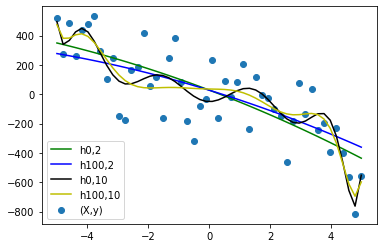

In [51]:
# Vaš kôd ovdje
plt.scatter(X_2, y_2, label = "(X,y)")

lams = [0, 100]
ds = [2, 10]
ind = 1
for d in ds:
    poly = PolynomialFeatures(d)
    fie_5 = poly.fit_transform(X_2)
    for lam in lams:
        clf = Ridge(alpha = lam)
        clf.fit(fie_5, y_2)
        plt.plot(X_2, clf.predict(fie_5), color[ind] + '-', label = "h" + str(lam) + "," + str(d))
        ind += 1
plt.legend(loc="best")
plt.show()

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


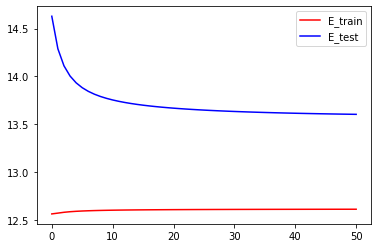

In [68]:
# Vaš kôd ovdje
E_train = []
E_test = []
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.5)
poly = PolynomialFeatures(10)

for lam in (np.arange(0,51)):
    
    clf = Ridge(alpha = lam)
    clf.fit(poly.fit_transform(X_train), y_train)
    
    E_train.append(np.sum((y_train - clf.predict(poly.fit_transform(X_train))) ** 2) / 2)
    E_test.append(np.sum((y_test - clf.predict(poly.fit_transform(X_test))) ** 2) / 2)

plt.plot(np.arange(0,51), log(E_train), 'r-', label = "E_train")
plt.plot(np.arange(0,51), log(E_test), 'b-', label = "E_test")
plt.legend(loc="best")
plt.show()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [69]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

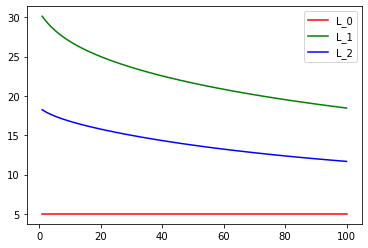

In [81]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
poly = PolynomialFeatures(5)
L_0 = []
L_1 = []
L_2 = []

for lam in (np.arange(1,101)):
    
    clf = Ridge(alpha = lam)
    clf.fit(poly.fit_transform(X_train_3), y_train_3)
    
    L_0.append(nonzeroes(clf.coef_[0][1:]))
    L_1.append(np.sum(np.abs(clf.coef_[0][1:])))
    L_2.append(sqrt(np.sum(clf.coef_[0][1:] ** 2)))

plt.plot(np.arange(1,101), L_0, 'r-', label = "L_0")
plt.plot(np.arange(1,101), L_1, 'g-', label = "L_1")
plt.plot(np.arange(1,101), L_2, 'b-', label = "L_2")
plt.legend(loc="best")
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

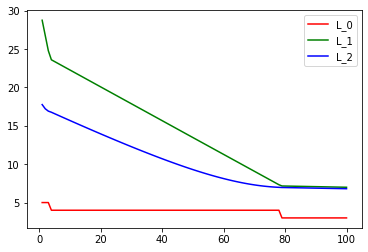

In [83]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje
L_0 = []
L_1 = []
L_2 = []

for lam in (np.arange(1,101)):
    
    clf = Lasso(alpha = lam)
    clf.fit(poly.fit_transform(X_train_3), y_train_3)
    
    L_0.append(nonzeroes(clf.coef_[1:]))
    L_1.append(np.sum(np.abs(clf.coef_[1:])))
    L_2.append(sqrt(np.sum(clf.coef_[1:] ** 2)))

plt.plot(np.arange(1,101), L_0, 'r-', label = "L_0")
plt.plot(np.arange(1,101), L_1, 'g-', label = "L_1")
plt.plot(np.arange(1,101), L_2, 'b-', label = "L_2")
plt.legend(loc="best")
plt.show()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [89]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

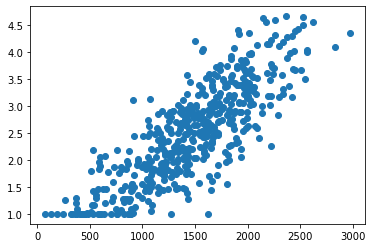

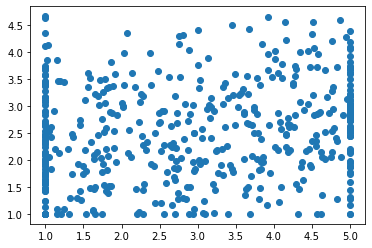

In [90]:
# Vaš kôd ovdje
plt.scatter(grades_X[:, 0], grades_y)
plt.show()
plt.scatter(grades_X[:, 1], grades_y)
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [93]:
# Vaš kôd ovdje
clf = Ridge(alpha = 0.01)
clf.fit(grades_X, grades_y)
print(clf.intercept_)
print(clf.coef_)

#plt.scatter(grades_X[:, 0], grades_y)
#plt.scatter(grades_X[:, 0], clf.predict(grades_X), c = 'r')
#plt.show()
#plt.scatter(grades_X[:, 1], grades_y)
#plt.scatter(grades_X[:, 1], clf.predict(grades_X), c = 'r')
#plt.show()

0.15061179575776018
[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [98]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1,1))

clf = Ridge(alpha = 0.01)
clf.fit(grades_X_fixed, grades_y_fixed)

print(clf.intercept_)
print(clf.coef_)

[8.62551331e-17]
[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [99]:
# Vaš kôd ovdje
grades_X_fixed_colinear = np.insert(grades_X_fixed, grades_X_fixed.shape[1], grades_X_fixed[:,1], axis=1)
grades_X_fixed_colinear

array([[ 0.95063817, -0.78607869, -0.78607869],
       [-0.50343434, -0.50193004, -0.50193004],
       [ 1.18596832, -0.52213172, -0.52213172],
       ...,
       [-0.31593552,  0.80074234,  0.80074234],
       [ 0.81288393,  1.24783236,  1.24783236],
       [-0.01938126,  1.21729714,  1.21729714]])

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [101]:
# Vaš kôd ovdje
clf = Ridge(alpha = 0.01)
clf.fit(grades_X_fixed_colinear, grades_y_fixed)
print(clf.intercept_)
print(clf.coef_)

[8.6255971e-17]
[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [69]:
# Vaš kôd ovdje

coef_lam1 = []
coef_lam2 = []
for i in range(10):
    mask = np.full(grades_X_fixed_colinear.shape[0], False)
    mask[:int(grades_X_fixed_colinear.shape[0] / 2)] = True
    np.random.shuffle(mask)
    grades_X_fixed_colinear_random = grades_X_fixed_colinear[mask]
    grades_y_random = grades_y_fixed[mask]
    
    clf = Ridge(alpha = 0.01)
    clf.fit(grades_X_fixed_colinear_random, grades_y_random)
    coef_lam1.append(clf.coef_)
    clf = Ridge(alpha = 1000)
    clf.fit(grades_X_fixed_colinear_random, grades_y_random)
    coef_lam2.append(clf.coef_)

print("lambda = 0.01")
for coef in coef_lam1:
    print(coef)
print("sd = " + str(np.std(coef_lam1,axis=0)))

print()
print("lambda = 1000")
for coef in coef_lam2:
    print(coef)
print("sd = " + str(np.std(coef_lam2,axis=0)))

lambda = 0.01
[0.77013799 0.07686244 0.07686244]
[0.79033565 0.07151315 0.07151315]
[0.73919337 0.06706281 0.06706281]
[0.74898968 0.06452315 0.06452315]
[0.72211741 0.06921525 0.06921525]
[0.71545649 0.05909807 0.05909807]
[0.70920738 0.05315837 0.05315837]
[0.80235815 0.06676225 0.06676225]
[0.78576222 0.06789329 0.06789329]
[0.7306423  0.08705812 0.08705812]
sd = [0.03187461 0.00876705 0.00876705]

lambda = 1000
[0.1441586  0.03206506 0.03206506]
[0.14906024 0.03070796 0.03070796]
[0.13120895 0.02543094 0.02543094]
[0.14459402 0.02568925 0.02568925]
[0.1357199  0.03177633 0.03177633]
[0.14590737 0.01526907 0.01526907]
[0.15110306 0.03303785 0.03303785]
[0.14900188 0.02920772 0.02920772]
[0.15111543 0.02606186 0.02606186]
[0.14051612 0.03708217 0.03708217]
sd = [0.00632031 0.00566754 0.00566754]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.